In [1]:
charles = open("data/charles.txt").read()
charles[:100]

'CHARLESMILLESMANSONNMADDOXNOVEMBERNOVEMBERWASANAMERICANCRIMINALANDCULTLEADERINTHELATESHEFORMEDWHATBE'

In [2]:
alphabet = "".join([chr(ord('A') + i%26) for i in range(500)])
alphabet[:100]

'ABCDEFGHIJKLMNOPQRSTUVWXYZABCDEFGHIJKLMNOPQRSTUVWXYZABCDEFGHIJKLMNOPQRSTUVWXYZABCDEFGHIJKLMNOPQRSTUV'

In [3]:
testparams = {"text":alphabet, "width":20, "height":6}

In [4]:
class CodeBlock(list):
    def __repr__(self):
        return "\n".join(self)

In [5]:
def makeblock(text, width, height):
    block = []
    assert(width * height <= len(text))
    for r in range(height):
        start = r * width
        stop = start + width
        block.append(text[start:stop])
    return CodeBlock(block)

In [6]:
makeblock(**testparams)

ABCDEFGHIJKLMNOPQRST
UVWXYZABCDEFGHIJKLMN
OPQRSTUVWXYZABCDEFGH
IJKLMNOPQRSTUVWXYZAB
CDEFGHIJKLMNOPQRSTUV
WXYZABCDEFGHIJKLMNOP

In [7]:
def makereverse(text, width, height):
    return CodeBlock([line[::-1] for line in makeblock(text, width, height)])

In [8]:
makereverse(**testparams)

TSRQPONMLKJIHGFEDCBA
NMLKJIHGFEDCBAZYXWVU
HGFEDCBAZYXWVUTSRQPO
BAZYXWVUTSRQPONMLKJI
VUTSRQPONMLKJIHGFEDC
PONMLKJIHGFEDCBAZYXW

In [9]:
def makezigzag(text, width, height):
    block = []
    for r, line in enumerate(makeblock(text, width, height)):
        block.append(line if (r%2 == 0) else line[::-1])
    return CodeBlock(block)

In [10]:
makezigzag(**testparams)

ABCDEFGHIJKLMNOPQRST
NMLKJIHGFEDCBAZYXWVU
OPQRSTUVWXYZABCDEFGH
BAZYXWVUTSRQPONMLKJI
CDEFGHIJKLMNOPQRSTUV
PONMLKJIHGFEDCBAZYXW

In [11]:
def makespiral(text, width, height):
    assert(width * height <= len(text))
    block = [[" "] * width for i in range(height)]
    nhoriz,nvert = width, height
    iterText = iter(text)
    direction = 0 # 0,1,2,3 = right, down, left, up
    c,r = -1,0    # start one step outside of the block
    while nhoriz > 0 and nvert > 0:
        if direction == 0:
            for n in range(nhoriz):
                c += 1
                block[r][c] = iterText.__next__()
            nvert -= 1
        elif direction == 1:
            for n in range(nvert):
                r += 1
                block[r][c] = iterText.__next__()
            nhoriz -= 1
        elif direction == 2:
            for n in range(nhoriz):
                c -= 1
                block[r][c] = iterText.__next__()
            nvert -= 1
        else:
            for n in range(nvert):
                r -= 1
                block[r][c] = iterText.__next__()
            nhoriz -= 1
        direction = (direction + 1) % 4
    block = ["".join(row) for row in block]
    return CodeBlock(block)

In [12]:
makespiral(**testparams)

ABCDEFGHIJKLMNOPQRST
VWXYZABCDEFGHIJKLMNU
UJKLMNOPQRSTUVWXYZOV
TIPONMLKJIHGFEDCBAPW
SHGFEDCBAZYXWVUTSRQX
RQPONMLKJIHGFEDCBAZY

In [13]:
from PIL import Image

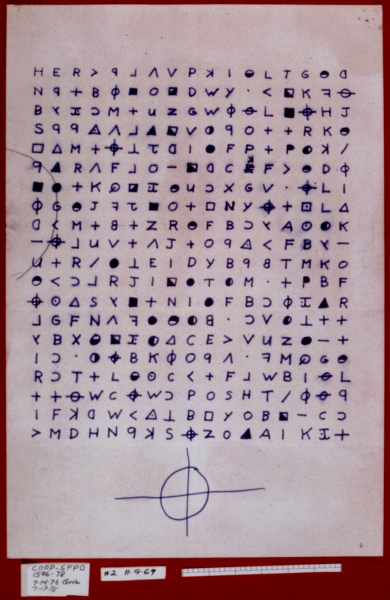

In [14]:
z340_raw = Image.open("images/390px-340-cipher-hi-resolution.jpg")
z340_raw

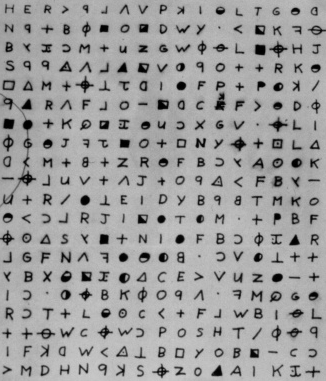

In [15]:
x,y = 29,63
width,height = 326, 381
crop_box = (x, y, x + width, y + height)
z340_cropped = z340_raw.crop(crop_box).convert("L")
z340_cropped

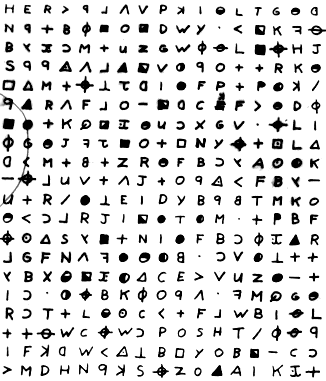

In [16]:
from PIL import ImageEnhance
brightness = ImageEnhance.Brightness(z340_cropped)
tmp = brightness.enhance(1.6)
contrast = ImageEnhance.Contrast(tmp)
z340_enhanced = contrast.enhance(2)
z340_enhanced

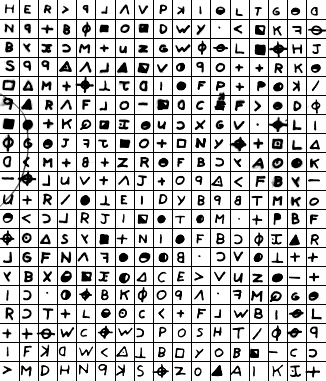

In [17]:
from PIL import ImageDraw

def testRaster(cols, rows, im):
    raster = im.copy()
    draw = ImageDraw.Draw(raster)
    dx = im.width / cols
    dy = im.height / rows
    for c in range(1, cols):
        draw.line((c * dx, 0, c * dx, im.height))
    for r in range(1, rows):
        draw.line((0, r * dy, im.width, r * dy))
    return raster

testRaster(17,20,z340_enhanced)

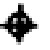

In [18]:
def z340_getSymbol(col, row):
    im = z340_enhanced
    dx = im.width / 17
    dy = im.height / 20
    crop_box = (col * dx, row * dy, (col+1) * dx, (row+1) * dy)
    return im.crop(crop_box)

z340_getSymbol(0,12).resize((50,50))

In [19]:
z340_code = open("data/e_z340.txt").read().split(";")
" ".join(z340_code[:20])

'H E R GT rP rL rV V P rK I Ob L T G Ot rD N rP PLUS'

In [20]:
z340_dict = {}
for n, symbol in enumerate(z340_code):
    z340_dict.setdefault(symbol,[]).append(n)

In [21]:
for key, positions in z340_dict.items():
    print(key + " : " + " ".join(map(str, positions)))

H : 0 49 300 326
E : 1 176 247
R : 2 65 87 143 172 191 220 272
GT : 3 98 248 323
rP : 4 18 52 53 61 85 163 181 264 305 328
rL : 5 56 90 155 190 221 283
rV : 6 55 88 159 225 265
V : 7 59 114 157 233 249
P : 8 79 297
rK : 9 83 96 308 329
I : 10 76 118 177 193 212 255 286 306 336
Ob : 11 241 277
L : 12 46 117 134 276 288
T : 13 183 196 274 301
G : 14 42 113 120 222 270
Ot : 15 67 99 109 121 144 187 228 271
rD : 16 75 94 136 309
N : 17 129 211 224 327
PLUS : 19 39 63 64 71 80 104 127 132 139 141 158 161 171 200 210 236 237 254 275 281 289 290 339
B : 20 34 146 167 180 202 215 239 260 285 314 318
PHI : 21 44 101 119 217 262 303
BOXf : 22 47 102 125 209
O : 23 62 91 126 162 186 263 298 317 333
BOXr : 24 107
D : 25 100 178 325
W : 26 43 284 292 295 310
Y : 27 130 179 316
DOT : 28 115 199 231 257 266
ST : 29 137 165 188 280 311
BOXl : 30 58 93 194 242 319
K : 31 66 105 152 185 261 337
rF : 32 123 226 267
THETA : 33 45 287 291 304
rY : 35 148 168 208 238
oIr : 36 243
rC : 37 111 147 189 216 232

Populating the interactive namespace from numpy and matplotlib


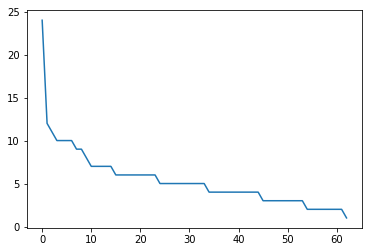

In [22]:
%pylab inline
frequecies = [len(ps) for ps in z340_dict.values()]
plot(sorted(frequecies, reverse = True))

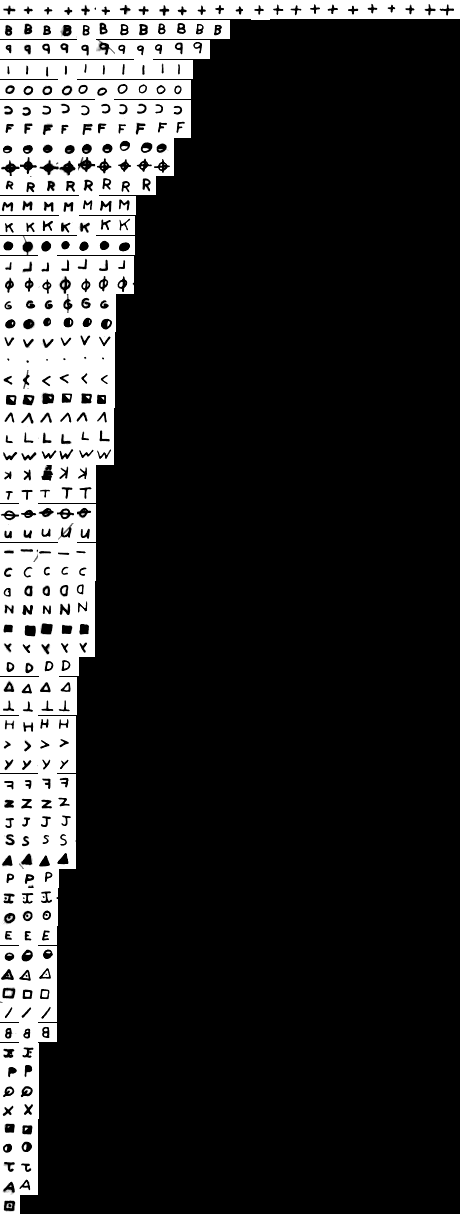

In [23]:
im_allrows = []
for key, positions in z340_dict.items():
    allPics = [z340_getSymbol(p % 17, p // 17) for p in positions]
    widths, heights = zip(*([pic.size for pic in allPics]))
    total_width, max_height = sum(widths), max(heights)
    im_all = Image.new("L", (total_width, max_height))
    x_offset = 0
    for pic in allPics:
        im_all.paste(pic, (x_offset,0))
        x_offset += pic.size[0]
    im_allrows.append(im_all)

widths, heights = zip(*([pic.size for pic in im_allrows]))
max_width, total_height = max(widths), sum(heights)
im_overview = Image.new("L", (max_width,total_height))
y_offset = 0
for pic in sorted(im_allrows, key=lambda a:a.width, reverse = True):
    im_overview.paste(pic, (0,y_offset))
    y_offset += pic.size[1]

im_overview